In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
os.chdir('../')

In [71]:
import numpy as np
from src.plots import *
from src.concept_vectors import *
from src.util import *
from src.hierarchy import *
from src.dataset import *

In [4]:
mnist_attributes = ["{}_color".format(i) for i in range(4)]
mnist_attributes += ["{}_number".format(i) for i in range(4)]
mnist_attributes += ["spurious"]
all_mnist_attributes = get_mnist_attributes()

In [5]:
cub_attributes = ['has_bill_shape::dagger', 
                       'has_bill_shape::hooked_seabird', 
                       'has_bill_shape::all-purpose', 
                       'has_bill_shape::cone', 
                       'has_leg_color::grey', 
                       'has_leg_color::black', 
                       'has_leg_color::buff', 
                       'has_bill_color::grey', 
                       'has_bill_color::black', 
                       'has_bill_color::buff']
all_cub_attributes = get_cub_attributes()

## Load all CBM Vectors for MNIST

In [6]:
mnist_vectors = []
mnist_metadata = []

In [7]:
for attribute in mnist_attributes: 
    cbm_vector = create_vector_from_label_mnist(attribute)
    mnist_vectors += list(cbm_vector)
    mnist_metadata+=[{'concept': attribute}]
mnist_metadata = np.array(mnist_metadata)

In [8]:
mnist_labels = [i['concept'] for i in mnist_metadata]

## Load all CBM Vectors for CUB

In [9]:
cub_vectors = []
cub_metadata = []

In [10]:
for attribute in cub_attributes: 
    cbm_vector = create_vector_from_label_cub(attribute)
    cub_vectors += list(cbm_vector)
    cub_metadata+=[{'concept': attribute}]
cub_metadata = np.array(cub_metadata)

In [11]:
cub_labels = [i['concept'] for i in cub_metadata]

## Construct MNIST Hierarchies

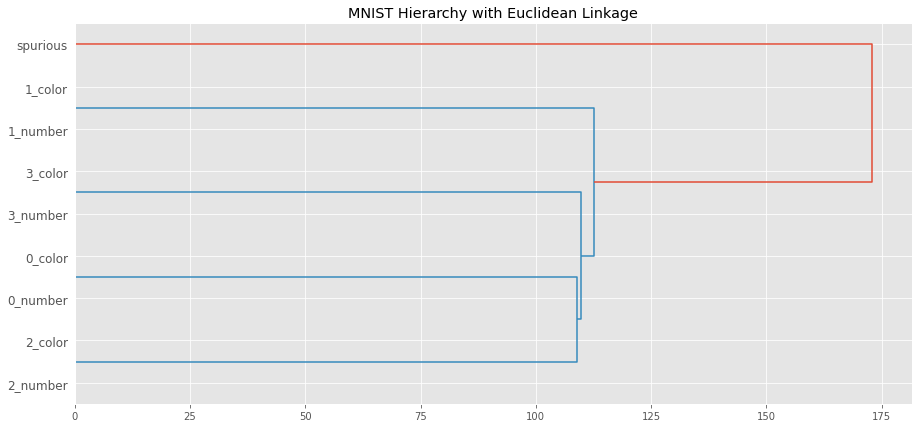

In [12]:
tree_info = create_linkage_hierarchy(mnist_vectors)
plot_dendogram(tree_info,mnist_labels)
plt.title("MNIST Hierarchy with Euclidean Linkage")
plt.savefig("scripts/Figures/mnist_dendogram_cbm.png")

Text(0.5, 1.0, 'MNIST Hierarchy with Cosine Linkage')

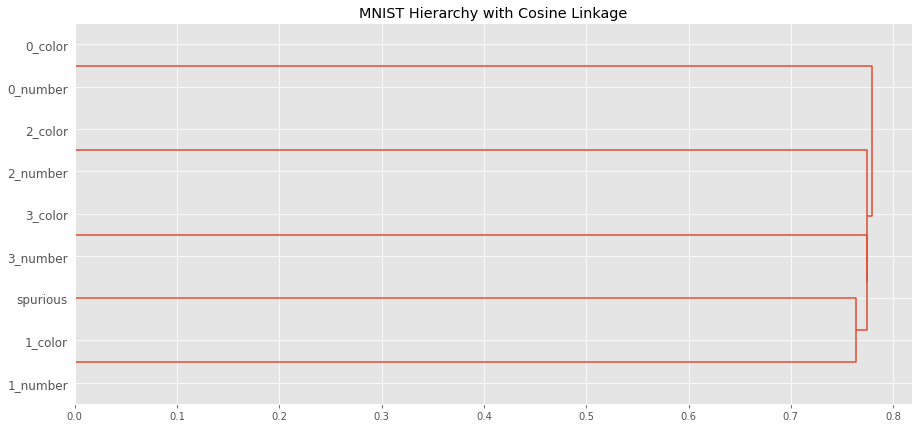

In [13]:
tree_info = create_linkage_hierarchy(mnist_vectors,metric='cosine')
plot_dendogram(tree_info,mnist_labels)
plt.title("MNIST Hierarchy with Cosine Linkage")

Text(0.5, 1.0, 'MNIST Hierarchy with Ward Linkage')

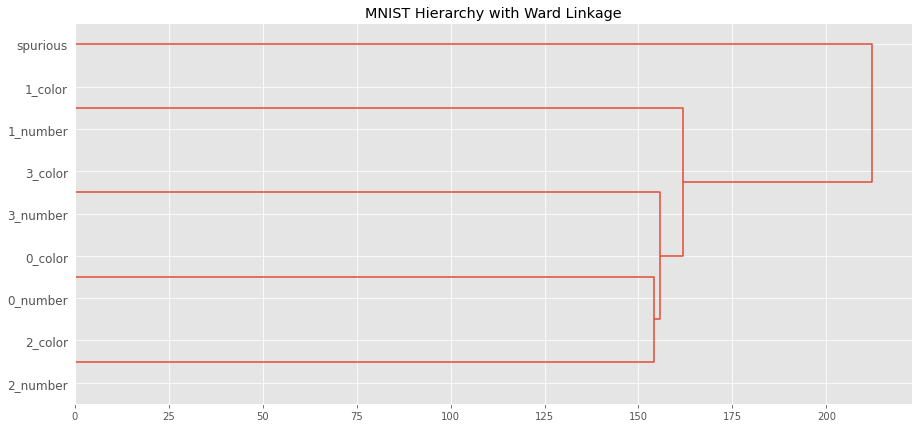

In [14]:
tree_info = create_ward_hierarchy(mnist_vectors)
plot_dendogram(tree_info,mnist_labels)
plt.title("MNIST Hierarchy with Ward Linkage")

Text(0.5, 1.0, 'MNIST Hierarchy with Graph Thresholding')

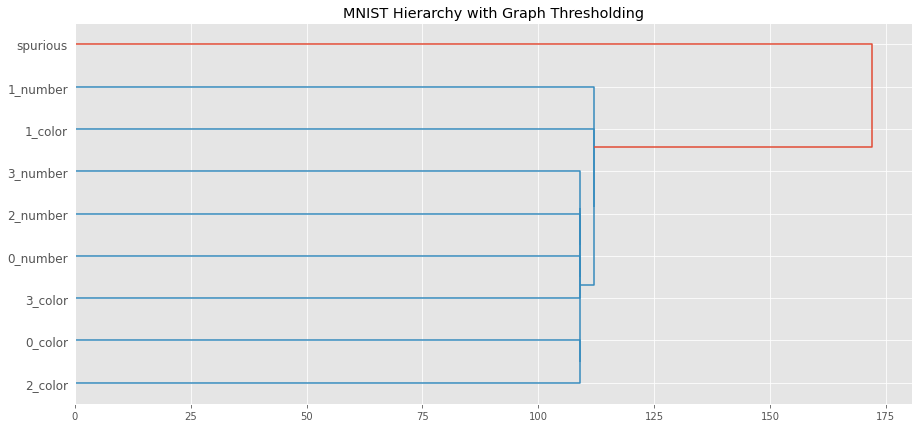

In [87]:
tree_info = create_hierarchy_thresholding(mnist_vectors,metric='euclidean')
plot_dendogram(tree_info,mnist_labels)
plt.title("MNIST Hierarchy with Graph Thresholding")

In [66]:
def mutual_information(a,b):
    d = sum(a==b)/len(a)
    return min(d,1-d)

Text(0.5, 1.0, 'MNIST Hierarchy with Mutual Information Linkage')

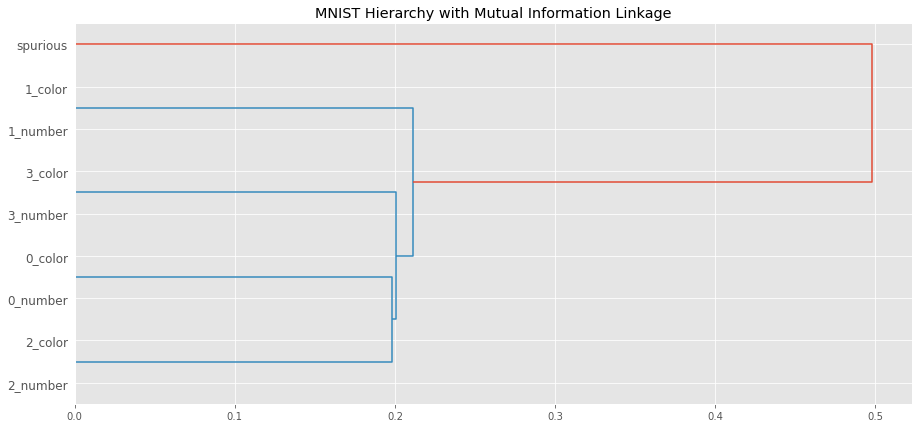

In [59]:
tree_info = create_linkage_hierarchy(mnist_vectors,metric=mutual_information)
plot_dendogram(tree_info,mnist_labels)
plt.title("MNIST Hierarchy with Mutual Information Linkage")

## Construct CUB Hierarchies

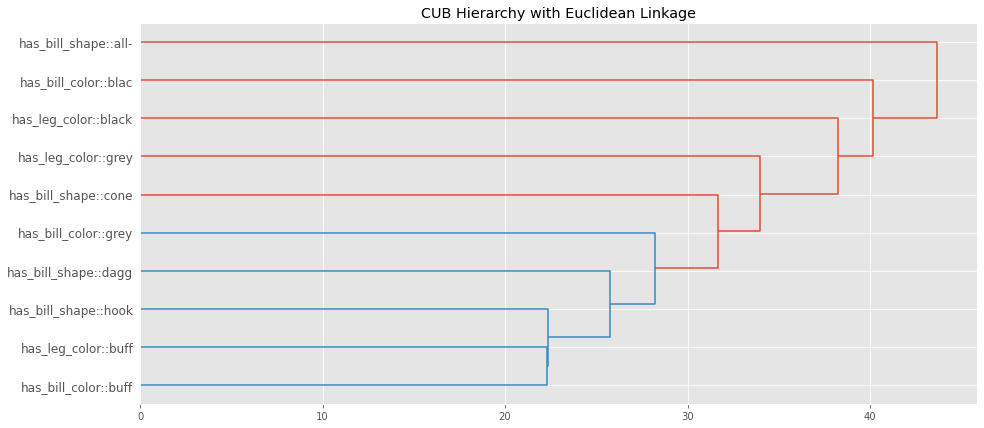

In [15]:
tree_info = create_linkage_hierarchy(cub_vectors)
plot_dendogram(tree_info,cub_labels)
plt.title("CUB Hierarchy with Euclidean Linkage")
plt.savefig("scripts/Figures/cub_dendogram_cbm.png")

Text(0.5, 1.0, 'CUB Hierarchy with Ward Linkage')

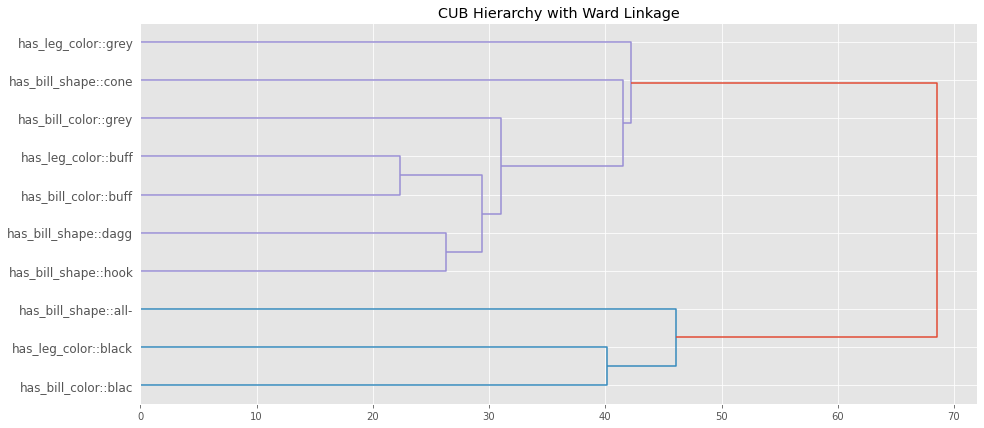

In [17]:
tree_info = create_ward_hierarchy(cub_vectors,metric='euclidean')
plot_dendogram(tree_info,cub_labels)
plt.title("CUB Hierarchy with Ward Linkage")

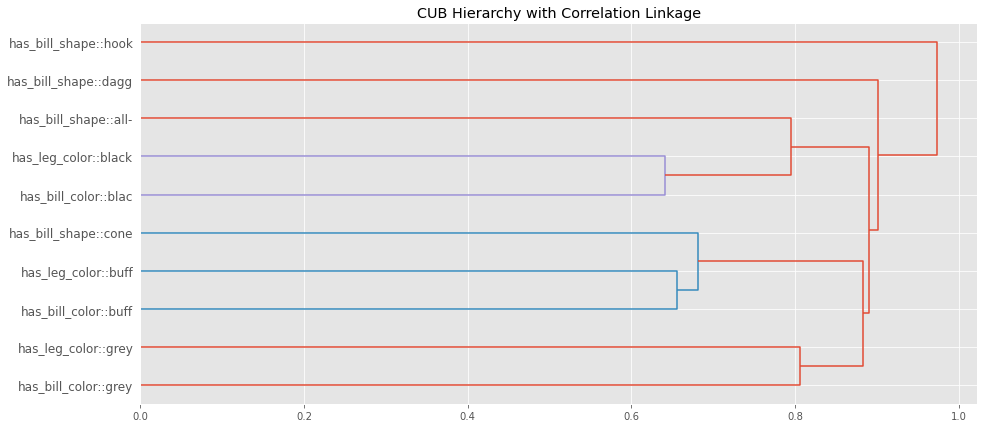

In [56]:
tree_info = create_linkage_hierarchy(cub_vectors,metric='correlation')
plot_dendogram(tree_info,cub_labels)
plt.title("CUB Hierarchy with Correlation Linkage")

Text(0.5, 1.0, 'CUB Hierarchy with Cosine Linkage')

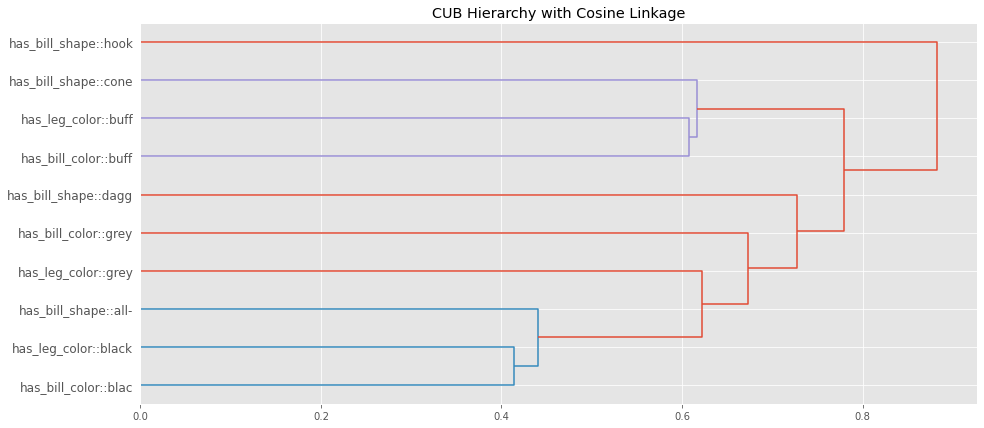

In [68]:
tree_info = create_linkage_hierarchy(cub_vectors,metric='cosine')
plot_dendogram(tree_info,cub_labels)
plt.title("CUB Hierarchy with Cosine Linkage")

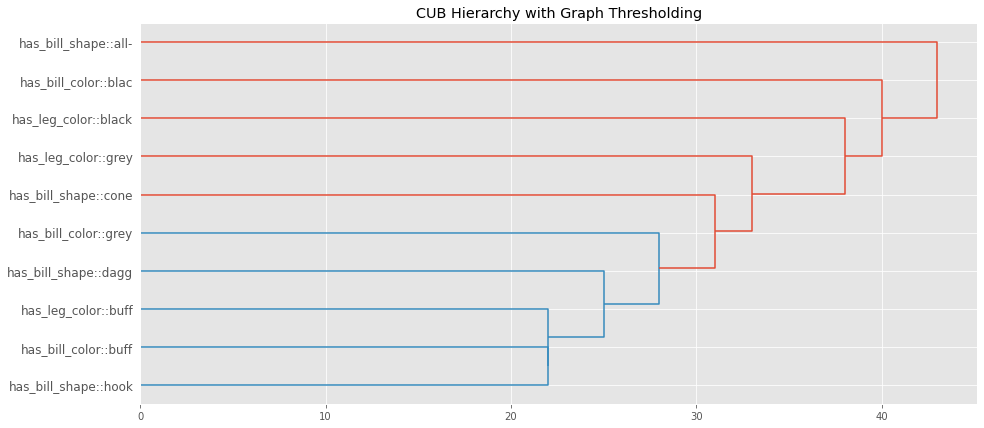

In [90]:
tree_info = create_hierarchy_thresholding(cub_vectors,metric='euclidean')
plot_dendogram(tree_info,cub_labels)
plt.title("CUB Hierarchy with Graph Thresholding")
plt.savefig("scripts/Figures/cub_dendogram_thresholding.png")

Text(0.5, 1.0, 'CUB Hierarchy with Mutual Information Linkage')

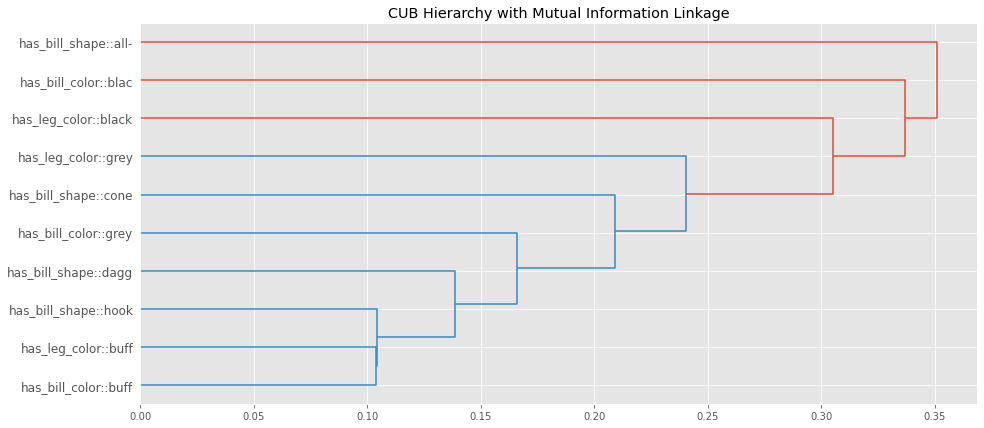

In [67]:
tree_info = create_linkage_hierarchy(cub_vectors,metric=mutual_information)
plot_dendogram(tree_info,cub_labels)
plt.title("CUB Hierarchy with Mutual Information Linkage")

## Understanding CUB Hierarchies

In [29]:
classes_by_attribute = {}
for i in cub_attributes:
    classes_by_attribute[i] = get_cub_classes_by_attribute(i)

In [31]:
classes_by_attribute["has_bill_color::buff"]

['Baird Sparrow',
 'Brewer Sparrow',
 'Clay colored Sparrow',
 'European Goldfinch',
 'Grasshopper Sparrow',
 'Gray crowned Rosy Finch',
 'Henslow Sparrow',
 'Laysan Albatross',
 'Savannah Sparrow',
 'Vesper Sparrow',
 'Worm eating Warbler']

In [43]:
num_in_common = {}
for i in cub_attributes:
    num_in_common[i] = {}
    for j in cub_attributes:
        if i == j:
            continue
        set_one = classes_by_attribute[i]
        set_two = classes_by_attribute[j]
        num_common = len(set(set_one).intersection(set(set_two)))
        num_in_common[i][j] = num_common/min(len(set_one), len(set_two))

In [53]:
images_by_attribute = {}
for i in cub_attributes:
    images_by_attribute[i] = len(get_cub_images_by_attribute(i))

In [44]:
num_in_common["has_leg_color::buff"]["has_bill_color::buff"]

0.5454545454545454

In [45]:
num_in_common["has_leg_color::buff"]["has_bill_shape::hooked_seabird"]

0.0

In [46]:
num_in_common["has_leg_color::buff"]["has_bill_shape::dagger"]

0.0

In [48]:
num_in_common["has_leg_color::buff"]

{'has_bill_shape::dagger': 0.0,
 'has_bill_shape::hooked_seabird': 0.0,
 'has_bill_shape::all-purpose': 0.36363636363636365,
 'has_bill_shape::cone': 0.45454545454545453,
 'has_leg_color::grey': 0.0,
 'has_leg_color::black': 0.045454545454545456,
 'has_bill_color::grey': 0.22727272727272727,
 'has_bill_color::black': 0.13636363636363635,
 'has_bill_color::buff': 0.5454545454545454}

In [49]:
num_in_common["has_bill_color::buff"]

{'has_bill_shape::dagger': 0.0,
 'has_bill_shape::hooked_seabird': 0.09090909090909091,
 'has_bill_shape::all-purpose': 0.09090909090909091,
 'has_bill_shape::cone': 0.8181818181818182,
 'has_leg_color::grey': 0.0,
 'has_leg_color::black': 0.09090909090909091,
 'has_leg_color::buff': 0.5454545454545454,
 'has_bill_color::grey': 0.09090909090909091,
 'has_bill_color::black': 0.0}

In [51]:
num_in_common["has_bill_shape::dagger"]

{'has_bill_shape::hooked_seabird': 0.0,
 'has_bill_shape::all-purpose': 0.0,
 'has_bill_shape::cone': 0.0,
 'has_leg_color::grey': 0.29411764705882354,
 'has_leg_color::black': 0.29411764705882354,
 'has_leg_color::buff': 0.0,
 'has_bill_color::grey': 0.11764705882352941,
 'has_bill_color::black': 0.6470588235294118,
 'has_bill_color::buff': 0.0}

In [52]:
num_in_common["has_bill_shape::hooked_seabird"]

{'has_bill_shape::dagger': 0.0,
 'has_bill_shape::all-purpose': 0.0,
 'has_bill_shape::cone': 0.0,
 'has_leg_color::grey': 0.08333333333333333,
 'has_leg_color::black': 0.25,
 'has_leg_color::buff': 0.0,
 'has_bill_color::grey': 0.0,
 'has_bill_color::black': 0.25,
 'has_bill_color::buff': 0.09090909090909091}

In [55]:
num_in_common["has_leg_color::black"]

{'has_bill_shape::dagger': 0.29411764705882354,
 'has_bill_shape::hooked_seabird': 0.25,
 'has_bill_shape::all-purpose': 0.45454545454545453,
 'has_bill_shape::cone': 0.16326530612244897,
 'has_leg_color::grey': 0.1111111111111111,
 'has_leg_color::buff': 0.045454545454545456,
 'has_bill_color::grey': 0.08,
 'has_bill_color::black': 0.7818181818181819,
 'has_bill_color::buff': 0.09090909090909091}

In [54]:
images_by_attribute

{'has_bill_shape::dagger': 407,
 'has_bill_shape::hooked_seabird': 286,
 'has_bill_shape::all-purpose': 1947,
 'has_bill_shape::cone': 1165,
 'has_leg_color::grey': 1087,
 'has_leg_color::black': 1322,
 'has_leg_color::buff': 531,
 'has_bill_color::grey': 588,
 'has_bill_color::black': 2365,
 'has_bill_color::buff': 257}